In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

MARKERS = ['+', 'x', '.']
COLORS = ['red', 'green', 'blue']

def plot_points(xy, labels):
    
    for i, label in enumerate(set(labels)):
        points = np.array([xy[j,:] for j in range(len(xy)) if labels[j] == label])
        marker = MARKERS[i % len(MARKERS)]
        color = COLORS[i % len(COLORS)]
        plt.scatter(points[:,0], points[:,1], marker=marker, color=color)
        
def plot_boundary(X, pred):
    
    x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
    
    xs, ys = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    xys = np.column_stack([xs.ravel(), ys.ravel()])
    zs = pred(xys).reshape(xs.shape)

    plt.contour(xs, ys, zs, colors='black')

In [63]:
import numpy as np
import sklearn
import sklearn.datasets
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

class Network(object):
    
    def __init__(self, shape, reg=0.01):
        inputs = shape[:-1]
        outputs = shape[1:]

        self.weights = np.array([np.random.randn(i, o) for i, o in zip(inputs, outputs)])
        self.biases = [np.random.randn(1, o) for o in outputs]
        self.regularization = reg

    def predict(self, X):
        activations, _ = self.feed_forward(X)
        return np.argmax(activations[-1], axis=1)

    def cost(self, X, y):

        activations, _ = self.feed_forward(X)
        output = activations[-1]
        err = (-y) * np.log(output) - (1 - y) * np.log(1 - output)
        cost = np.sum(err) / len(X)

        return cost

    def feed_forward(self, examples):

        activations = [examples]
        combinations = [examples]

        for weights, bias in zip(self.weights, self.biases):
            combinations.append(np.dot(activations[-1], weights) + bias)
            activations.append(sigmoid(combinations[-1]))

        return activations, combinations

    def backpropagate(self, examples, labels):

        activations, combinations = self.feed_forward(examples)
        delta = activations[-1] - labels
        weight_grads = []
        bias_grads = []

        for i in reversed(range(len(self.weights))):
            weight = self.weights[i]
            
            weight_grads.append(np.dot(activations[i].T, delta) + self.regularization * weight)
            bias_grads.append(np.sum(delta, axis=0))
            
            delta = delta.dot(weight.T) * sigmoid_prime(combinations[i])

        weight_grads.reverse()
        bias_grads.reverse()

        return weight_grads, bias_grads

    def fit(self, examples, labels, iterations=20000, learning_rate=0.01, iter_fn=None):

        for i in range(iterations):
            weight_grads, bias_grads = network.backpropagate(examples, labels)

            self.weights = [w - learning_rate * d for w, d in zip(self.weights, weight_grads)]
            self.biases = [b - learning_rate * d for b, d in zip(self.biases, bias_grads)]

            if iter_fn: iter_fn(i)
         
        return self

X, y = sklearn.datasets.make_moons(200, noise=0.20)
yy = label_binarize([i + 1 for i in y], [1, 2, 3])[:,0:2]

def iter_fn(i):
    if i % 1000 == 0:
        print(i, network.cost(X, yy))

shape = (X.shape[1], 10, 10, yy.shape[1])

network = Network(shape, reg=0.01)
network.fit(X, yy, iter_fn=iter_fn)
predicted = network.predict(X)

print(accuracy_score(y, predicted))

0 2.03535925467
1000 0.042484596075
2000 0.0327315864139
3000 0.0298162597681
4000 0.0284384863535
5000 0.0276502662105
6000 0.0271407916699
7000 0.0267817177696
8000 0.0265129263202
9000 0.02630157843
10000 0.0261266136938
11000 0.0259726799729
12000 0.0258272201517
13000 0.0256787303375
14000 0.0255156009629
15000 0.0253253514706
16000 0.0250943159402
17000 0.0248081441381
18000 0.0244538577054
19000 0.0240243642992
0.995


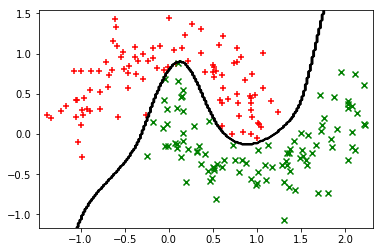

In [64]:
plot_points(X, y)
plot_boundary(X, lambda x: network.predict(x))